In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv, sys, time, os, re
import scipy.optimize
from math import *

In [3]:
def do_plot (Res, label=None, show_name=True):
    plt.errorbar(Res['T_mean'], Res['D'], xerr=Res['T_err'], yerr=Res['D_err'], linestyle=' ', label=label)
    plt.scatter([0],[0])
    if show_name:
        for i in range(len(Res)):
            r = Res.iloc[i]
            plt.annotate(r['name'], (r['T_mean']+5,r['D']-1.2*r['D_err']), size=8, ha='center', va='top')

In [4]:
def do_plot_gamma (Res):
    gamma = Res['T_mean']/Res['D']
    gamma_err = gamma * ( Res['D_err']/Res['D'] + Res['T_err']/Res['T_mean'] )
    plt.errorbar(Res['T_mean'], gamma, xerr=Res['T_err'], yerr=gamma_err, linestyle=' ', label=r"$\gamma=k_B T / D$")

In [5]:
def load_folder (folders):
    Res = pd.DataFrame()
    for path in folders:
        df = pd.read_csv(path+"/diffus.csv", sep=',', header=None)
        df = df.set_index(0).T
        for col in ['T_mean','T_err','D','D_err']:
            df[col] = df[col].astype(float)
        df['N_traj'] = df['N_traj'].astype(int)
        d = dict(df)
        d['name'] = path
        df2 = pd.read_csv(path+"/params.csv", sep=',', header=None)
        d.update(dict(df2.set_index(0).T))
        Res = Res.append(pd.DataFrame(d), ignore_index=True, sort=False)
    return Res

---
### Most recent data
(fit with full $\tau$-$D$ curve, improved trajectory screening and premature ending handling)

In [26]:
Res800 = load_folder(["remi1","remi5","remi6","remi7","remi8","remi9","remi10"])
Res400 = load_folder(["res3","res4","res5"])
Res800bigm = load_folder(["res51"])

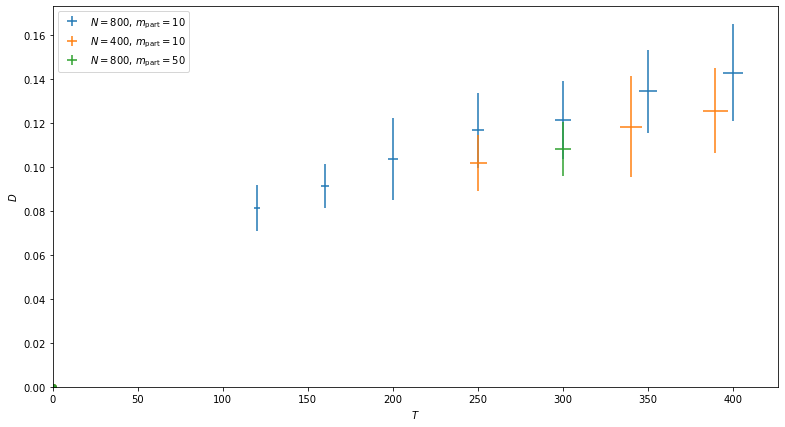

In [32]:
plt.figure(figsize=(13,7))
show_name = False
do_plot(Res800, label=r"$N=800$, $m_\operatorname{part}=10$", show_name=show_name)
do_plot(Res400, label=r"$N=400$, $m_\operatorname{part}=10$", show_name=show_name)
do_plot(Res800bigm, label=r"$N=800$, $m_\operatorname{part}=50$", show_name=show_name)
plt.ylim((0,None))
plt.xlim((0,None))
plt.legend(loc='upper left')
plt.xlabel(r"$T$")
plt.ylabel(r"$D$")
plt.savefig("diffus-D-T.pdf")

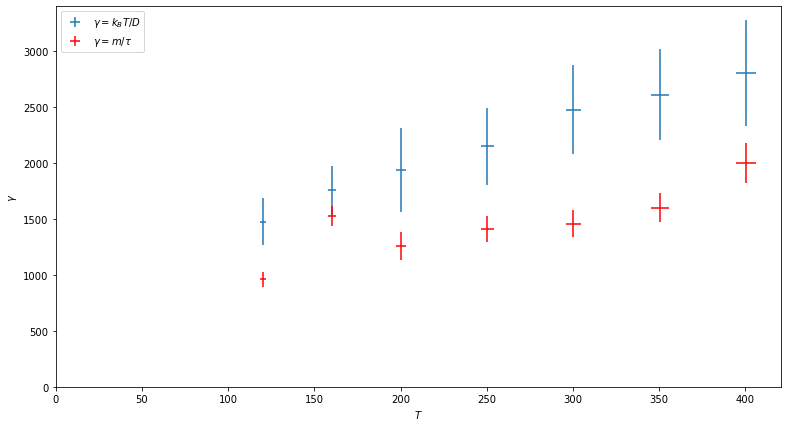

In [34]:
plt.figure(figsize=(13,7))
do_plot_gamma(Res800)
plt.errorbar(Res800['T_mean'], Res800['gamma'], xerr=Res800['T_err'], yerr=Res800['gamma_err'], linestyle=' ', label=r"$\gamma=m/\tau$", color="red")
plt.ylim((0,None))
plt.xlim((0,None))
plt.legend(loc='upper left')
plt.xlabel(r"$T$")
plt.ylabel(r"$\gamma$")
plt.savefig("diffus-gamma-T.pdf")

---
### Old data
(fit with linear curve)

In [22]:
Res2 = pd.DataFrame({
    'name'  : [  "1",   "2",   "3",   "4",   "5",   "6",   "7",   "8",   "9",  "10",  "11"],
    'T_mean': [178.6, 150.0, 134.9, 219.9, 199.9, 209.9, 275.2, 114.9, 350.7, 300.0, 380.3],
    'T_err' : [  3.5,   3.2,   2.7,   4.3,   3.9,   4.1,   5.3,   2.3,   6.7,   5.7,   7.2],
    'D'     : [0.332, 0.321, 0.316, 0.370, 0.367, 0.379, 0.434, 0.255, 0.527, 0.456, 0.518],
    'D_err' : [0.038, 0.044, 0.030, 0.034, 0.036, 0.040, 0.039, 0.028, 0.041, 0.041, 0.047]
})
Res2['D'] /= 4
Res2['D_err'] /= 4
Res2

,name,T_mean,T_err,D,D_err
0,1,178.6,3.5,0.08300,0.00950
1,2,150.0,3.2,0.08025,0.01100
2,3,134.9,2.7,0.07900,0.00750
3,4,219.9,4.3,0.09250,0.00850
4,5,199.9,3.9,0.09175,0.00900
5,6,209.9,4.1,0.09475,0.01000
6,7,275.2,5.3,0.10850,0.00975
7,8,114.9,2.3,0.06375,0.00700
8,9,350.7,6.7,0.13175,0.01025
9,10,300.0,5.7,0.11400,0.01025


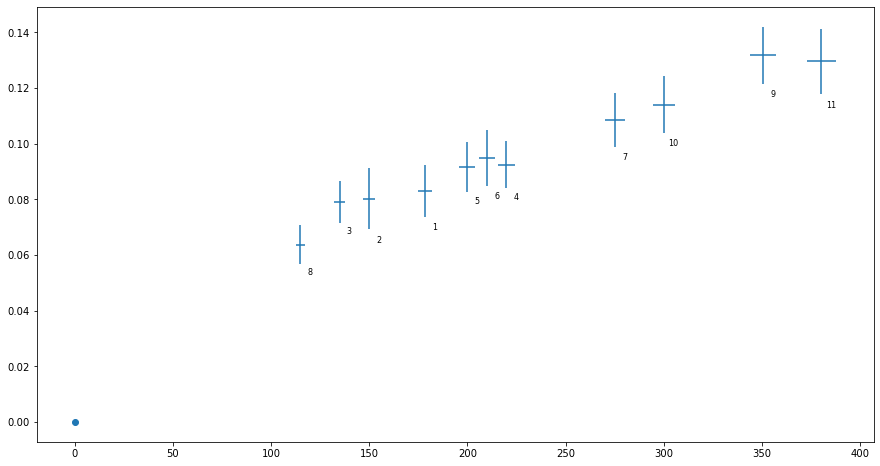

In [23]:
plt.figure(figsize=(15,8))
do_plot(Res2)

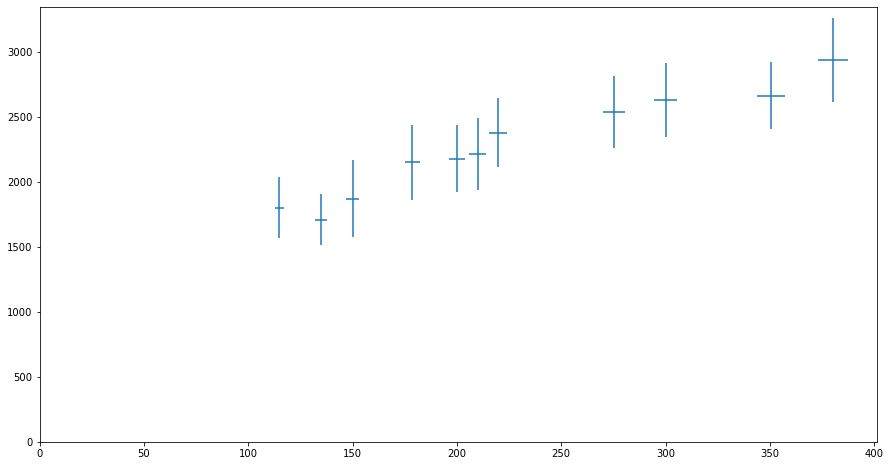

In [25]:
plt.figure(figsize=(15,8))
do_plot_gamma(Res2)
plt.ylim((0,None))
plt.xlim((0,None))
None